# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [3]:
# Import required libraries
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from PIL import Image



## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [4]:
# Load the Oxford Flowers 102 dataset using TensorFlow Datasets
dataset_name = "oxford_flowers102"
dataset, dataset_info = tfds.load(dataset_name, as_supervised=True, with_info=True)

# Split the dataset into training, validation, and test sets
train_set = dataset['train']
val_set = dataset['validation']
test_set = dataset['test']


Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/2 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:01<?, ? url/s]
Dl Size...: 0 MiB [00:01, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:01<?, ? url/s]
Dl Size...: 0 MiB [00:01, ? MiB/s]

Dl Completed...:  33%|███▎      | 1/3 [00:01<00:03,  1.58s/ url]
Dl Size...: 0 MiB [00:01, ? MiB/s]

Dl Completed...:  67%|██████▋   | 2/3 [00:01<00:01,  1.58s/ url]
Dl Size...: 0 MiB [00:01, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:01<?, ? MiB/s]

Extraction completed...: 0 file [00:01, ? file/s]
Dl Size...:   0%|          | 1/328 [00:02<12:05,  2.22s/ MiB]

Dl Size...:   1%|          | 2/328 [00:02<12:02,  2.22s/ MiB]

Dl Size...:   1%|         

Dl Size...:  35%|███▌      | 116/328 [00:06<00:08, 24.21 MiB/s]

Dl Size...:  36%|███▌      | 117/328 [00:06<00:08, 24.21 MiB/s]

Dl Size...:  36%|███▌      | 118/328 [00:06<00:08, 24.21 MiB/s]

Dl Size...:  36%|███▋      | 119/328 [00:06<00:08, 24.21 MiB/s]

Dl Size...:  37%|███▋      | 120/328 [00:06<00:08, 24.21 MiB/s]

Dl Size...:  37%|███▋      | 121/328 [00:06<00:08, 24.21 MiB/s]

Dl Size...:  37%|███▋      | 122/328 [00:06<00:08, 24.21 MiB/s]

Dl Size...:  38%|███▊      | 123/328 [00:06<00:08, 24.21 MiB/s]

Dl Size...:  38%|███▊      | 124/328 [00:06<00:08, 24.21 MiB/s]

Dl Size...:  38%|███▊      | 125/328 [00:06<00:08, 24.21 MiB/s]

Dl Size...:  38%|███▊      | 126/328 [00:06<00:08, 24.21 MiB/s]

Dl Size...:  39%|███▊      | 127/328 [00:06<00:08, 24.21 MiB/s]

Dl Size...:  39%|███▉      | 128/328 [00:06<00:08, 24.21 MiB/s]

Dl Size...:  39%|███▉      | 129/328 [00:06<00:08, 24.21 MiB/s]

Dl Size...:  40%|███▉      | 130/328 [00:06<00:08, 24.21 MiB/s]

Dl Size...:  40%|███▉    

Dl Size...:  72%|███████▏  | 237/328 [00:10<00:03, 28.59 MiB/s]

Dl Size...:  73%|███████▎  | 238/328 [00:10<00:03, 28.59 MiB/s]

Dl Size...:  73%|███████▎  | 239/328 [00:10<00:03, 28.59 MiB/s]

Dl Size...:  73%|███████▎  | 240/328 [00:10<00:03, 28.59 MiB/s]

Extraction completed...: 0 file [00:10, ? file/s]
Dl Size...:  73%|███████▎  | 241/328 [00:10<00:03, 28.06 MiB/s]

Dl Size...:  74%|███████▍  | 242/328 [00:10<00:03, 28.06 MiB/s]

Dl Size...:  74%|███████▍  | 243/328 [00:10<00:03, 28.06 MiB/s]

Dl Size...:  74%|███████▍  | 244/328 [00:10<00:02, 28.06 MiB/s]

Dl Size...:  75%|███████▍  | 245/328 [00:10<00:02, 28.06 MiB/s]

Dl Size...:  75%|███████▌  | 246/328 [00:10<00:02, 28.06 MiB/s]

Dl Size...:  75%|███████▌  | 247/328 [00:10<00:02, 28.06 MiB/s]

Dl Size...:  76%|███████▌  | 248/328 [00:10<00:02, 28.06 MiB/s]

Dl Size...:  76%|███████▌  | 249/328 [00:10<00:02, 28.06 MiB/s]

Dl Size...:  76%|███████▌  | 250/328 [00:10<00:02, 28.06 MiB/s]

Dl Size...:  77%|███████▋  | 251/328 [00

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.88 MiB/s]

Extraction completed...:  11%|█         | 903/8189 [01:26<06:00, 20.22 file/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.88 MiB/s]

Dl Size...

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Extraction completed...:  56%|█████▌    | 4584/8189 [01:47<00:21, 166.47 file/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 27.88 MiB/s]

Dl Size...: 100%|████████

## Explore the Dataset

In [7]:
# Get the number of examples in each set
num_train_samples = dataset_info.splits['train'].num_examples
num_val_samples = dataset_info.splits['validation'].num_examples
num_test_samples = dataset_info.splits['test'].num_examples

# Get the number of classes in the dataset
num_classes = dataset_info.features['label'].num_classes

# Print dataset statistics
print(f" Number of Classes: {num_classes}")
print(f"Training Set Samples: {num_train_samples}")
print(f"Validation Set Samples: {num_val_samples}")
print(f"Test Set Samples: {num_test_samples}")


 Number of Classes: 102
Training Set Samples: 1020
Validation Set Samples: 1020
Test Set Samples: 6149


In [8]:
# Take 3 images from the training set and print their shape & label
for image, label in train_set.take(3):  # Take the first 3 images
    print(f"Image Shape: {image.shape}, Label: {label.numpy()}")



Image Shape: (500, 667, 3), Label: 72
Image Shape: (500, 666, 3), Label: 84
Image Shape: (670, 500, 3), Label: 70


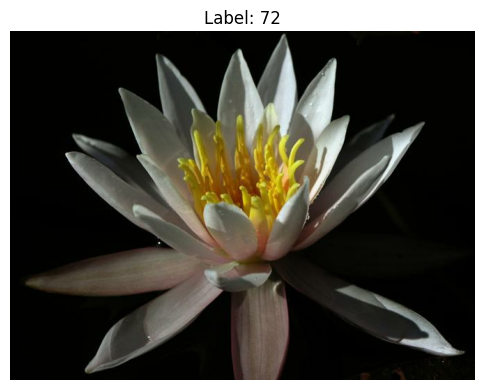

In [9]:
# Take one image-label pair from the training set
image, label = next(iter(train_set))  

image = image.numpy()

# Plot the image
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.title(f"Label: {label.numpy()}")  
plt.axis("off")  
plt.show()


### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [10]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

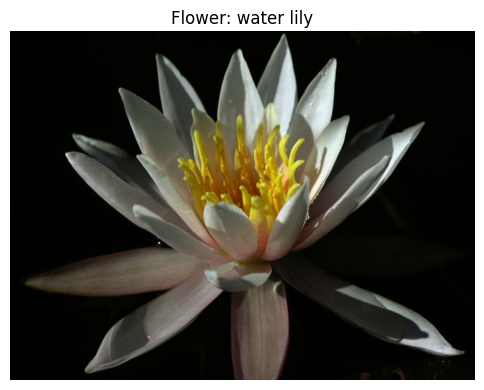

In [14]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 

image, label = next(iter(train_set))

# Convert image tensor to NumPy array for visualization
image = image.numpy()

# Get the class name from the label mapping
flower_name = class_names.get(str(label.numpy()), "Unknown Flower")  # Ensure label is a string key

# Plot the image
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.title(f"Flower: {flower_name}")  
plt.axis("off")  
plt.show()



## Create Pipeline

In [13]:
# Define image size & batch size
IMG_SIZE = 224  # Required for MobileNetV2
BATCH_SIZE = 32  # Standard batch size

# Function to preprocess images (resize + normalize)
def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))  # Resize image
    image = image / 255.0  # Normalize pixel values to [0,1]
    return image, label

# Create data pipelines
train_batches = (
    train_set
    .map(preprocess)  # Apply resizing 
    .shuffle(buffer_size=1000)  # Shuffle training data
    .batch(BATCH_SIZE)  # Batch for training
    .prefetch(tf.data.AUTOTUNE)  # Optimize performance
)

val_batches = (
    val_set
    .map(preprocess)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

test_batches = (
    test_set
    .map(preprocess)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

# Verify dataset structure
for images, labels in train_batches.take(1):
    print(f"Batch Image Shape: {images.shape}")  
    print(f"Batch Label Shape: {labels.shape}")  




Batch Image Shape: (32, 224, 224, 3)
Batch Label Shape: (32,)


# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [15]:
mobilenet_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor = hub.KerasLayer(mobilenet_url, input_shape=(224, 224, 3), trainable=False)

# Build the classification model
model = keras.Sequential([
    feature_extractor,  
    layers.Dense(512, activation='relu'),  
    layers.Dropout(0.3), 
    layers.Dense(256, activation='relu'),  
    layers.Dropout(0.3),
    layers.Dense(102, activation='softmax')  
])

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Adam optimizer
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Track accuracy
)

# Train the model
history = model.fit(
    train_batches,
    validation_data=val_batches,
    epochs=10  # Adjust epochs if needed
)

# Save the trained model
model.save("flower_classifier.h5")

print("Model training complete and saved as 'flower_classifier.h5'")



Epoch 1/10
32/32 [==============================] - 153s 5s/step - loss: 4.5667 - accuracy: 0.0471 - val_loss: 3.9756 - val_accuracy: 0.2520
Epoch 2/10
32/32 [==============================] - 146s 5s/step - loss: 3.4915 - accuracy: 0.2118 - val_loss: 2.7415 - val_accuracy: 0.4412
Epoch 3/10
32/32 [==============================] - 148s 5s/step - loss: 2.3387 - accuracy: 0.4225 - val_loss: 1.7637 - val_accuracy: 0.6147
Epoch 4/10
32/32 [==============================] - 152s 5s/step - loss: 1.4825 - accuracy: 0.6206 - val_loss: 1.3602 - val_accuracy: 0.6657
Epoch 5/10
32/32 [==============================] - 147s 5s/step - loss: 1.0688 - accuracy: 0.7167 - val_loss: 1.1595 - val_accuracy: 0.7137
Epoch 6/10
32/32 [==============================] - 147s 5s/step - loss: 0.7426 - accuracy: 0.8049 - val_loss: 1.0262 - val_accuracy: 0.7324
Epoch 7/10
32/32 [==============================] - 146s 5s/step - loss: 0.5466 - accuracy: 0.8480 - val_loss: 0.9374 - val_accuracy: 0.7529
Epoch 8/10
32

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model training complete and saved as 'flower_classifier.h5'


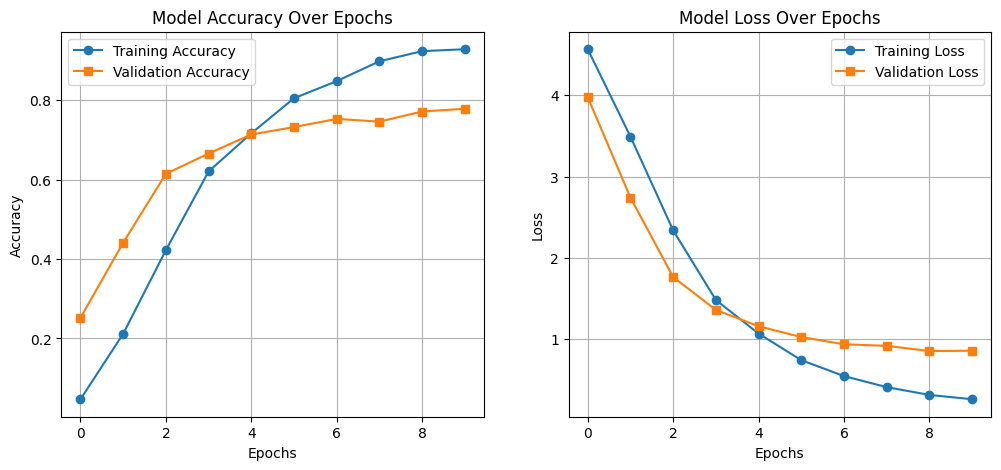

In [16]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
# Extract accuracy and loss history correctly
# Create figure for plots
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.show()




## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [17]:
# TODO: Print the loss and accuracy values achieved on the entire test set.
test_loss, test_accuracy = model.evaluate(test_batches)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4%}")  



193/193 [==============================] - 393s 2s/step - loss: 1.0528 - accuracy: 0.7278
Test Loss: 1.0528
Test Accuracy: 72.7761%


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [18]:
# TODO: Save your trained model as a Keras model.

model.save("flower_classifier.keras")

print("Model saved as 'flower_classifier.keras'")



Model saved as 'flower_classifier.keras'


## Load the Keras Model

Load the Keras model you saved above.

In [19]:
# TODO: Load the Keras model

loaded_model = tf.keras.models.load_model("flower_classifier.keras", custom_objects={'KerasLayer': hub.KerasLayer})

# Verify that the model is loaded correctly
loaded_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 102)               26214     
                                                                 
Total params: 3071398 (11.72 MB)
Trainable params: 81341

# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [20]:
# TODO: Create the process_image function

def process_image(image_path):
    """Preprocess an image for model inference."""
    image = Image.open(image_path)  # Load image
    image = np.asarray(image)  # Convert to NumPy array
    image = tf.image.resize(image, (224, 224)) / 255.0  # Resize & normalize
    return image.numpy()


To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

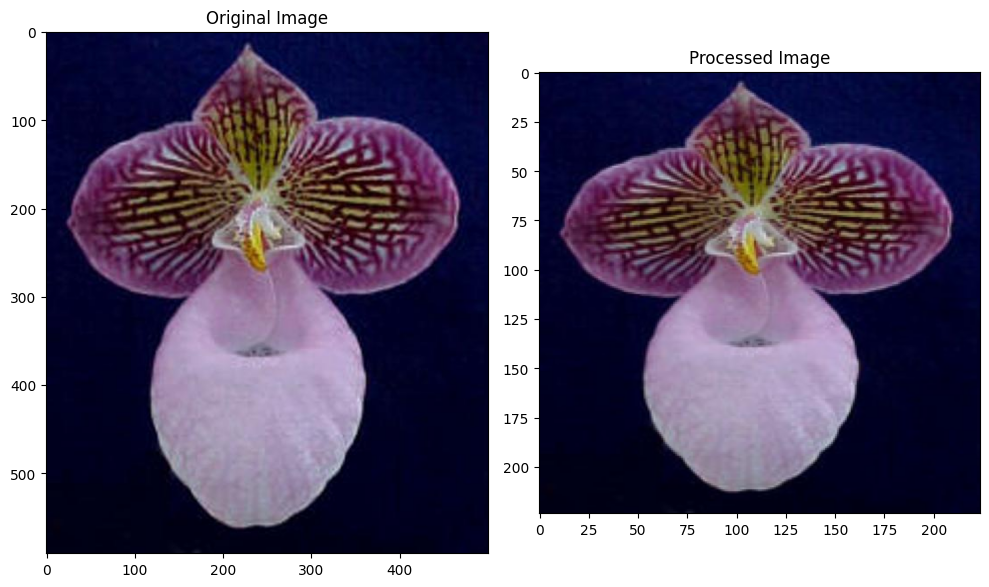

In [22]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

# Correct usage: Pass the file path, not the array
processed_test_image = process_image(image_path)

fig, (ax1, ax2) = plt.subplots(figsize=(10, 10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [23]:
# TODO: Create the predict function

def predict(image_path, model, top_k=5):
    """Predict the top K most likely class labels and probabilities."""
    
    processed_image = process_image(image_path)
    processed_image = np.expand_dims(processed_image, axis=0)

    predictions = model.predict(processed_image)
    top_k_indices = np.argsort(predictions[0])[-top_k:][::-1]
    
    probs = predictions[0][top_k_indices]
    classes = [str(i) for i in top_k_indices]

    return probs, classes



# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

1/1 [==============================] - 0s 471ms/step


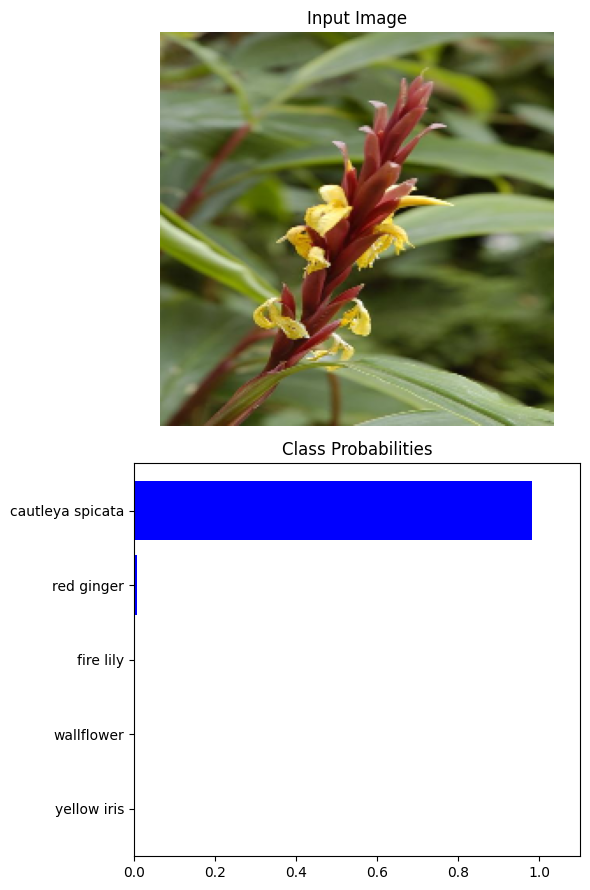

1/1 [==============================] - 0s 97ms/step


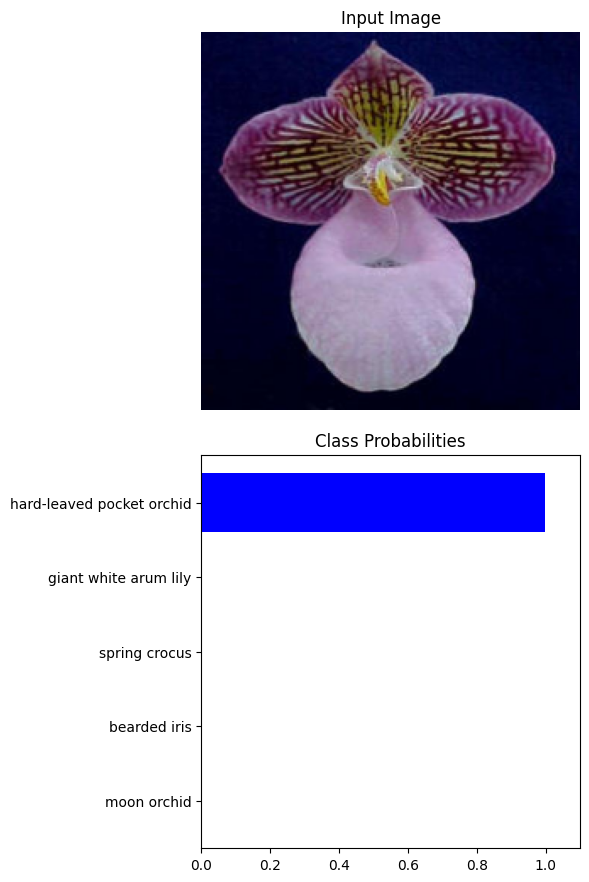

1/1 [==============================] - 0s 93ms/step


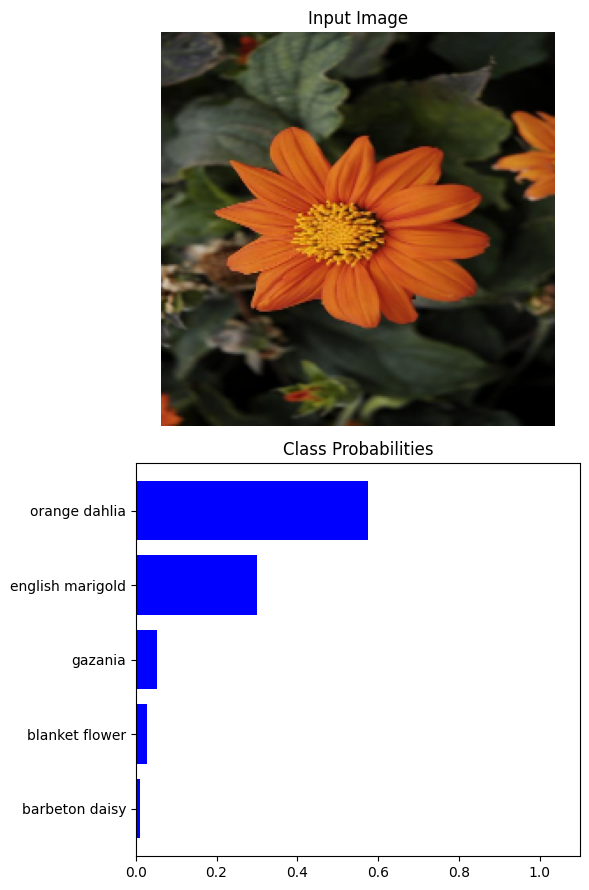

1/1 [==============================] - 0s 58ms/step


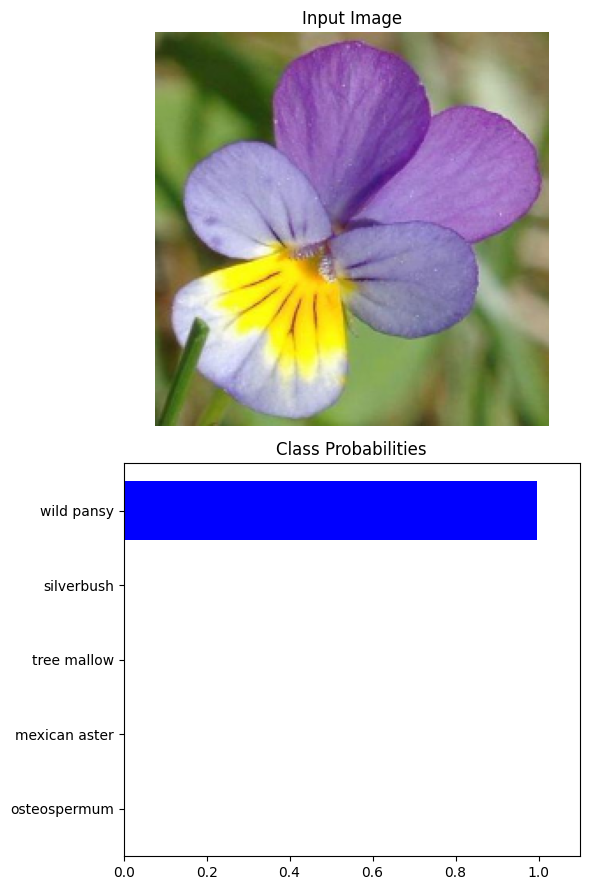

In [24]:
# TODO: Plot the input image along with the top 5 classes

import matplotlib.pyplot as plt

def plot_predictions(image_path, probs, classes, class_names):
    """Plot the input image alongside the top 5 predicted classes."""
    
    fig, (ax1, ax2) = plt.subplots(figsize=(6, 9), nrows=2)

    image = process_image(image_path)
    ax1.imshow(image)
    ax1.axis('off')
    ax1.set_title("Input Image")

    flower_names = [class_names.get(class_id, "Unknown") for class_id in classes]

    ax2.barh(flower_names, probs, color='blue')
    ax2.set_xlim(0, 1.1)
    ax2.invert_yaxis()
    ax2.set_title("Class Probabilities")

    plt.tight_layout()
    plt.show()
# List of test images
test_images = [
    "./test_images/cautleya_spicata.jpg",
    "./test_images/hard-leaved_pocket_orchid.jpg",
    "./test_images/orange_dahlia.jpg",
    "./test_images/wild_pansy.jpg"
]

# Load class names from label_map.json
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

# Run predictions and plot results for all test images
for image_path in test_images:
    probs, classes = predict(image_path, model, top_k=5)
    plot_predictions(image_path, probs, classes, class_names)